In [1]:
import string
from collections import defaultdict

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import matplotlib.pyplot as plt
import seaborn as sns

import nltk
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))
from wordcloud import STOPWORDS

import warnings

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/javier/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Index

1. [Importing Data](#data)
2. [Data Analysis](#data-analysis)
   1. [Meta Features](#meta-features)
   2. [Target](#target)
   3. [N-grams](#N-grams)

# Data

All Kaggle dataframes are preprocessed and merged to create a single training set. This is done to improve the performance of the machine learning model by providing more data to train on.

## Table 1

In [2]:
def preprocess_hate1(df_hate1):
    # Rename the columns
    df_hate1 = df_hate1.rename(columns={'tweet': 'text', 'class': 'target'})
    df_hate1['id'] = df_hate1.index
    # Create the 'target' column
    df_hate1['target'] = df_hate1['hate_speech'].apply(lambda x: 1 if x >= 1 else 0)
    # Drop unnecessary columns
    df_hate1 = df_hate1.drop(['Unnamed: 0', 'offensive_language', 'hate_speech', 'count', 'neither'], axis=1)
    # Reorder the columns
    df_hate1 = df_hate1.reindex(columns=['id', 'text', 'target'])
    
    return df_hate1

In [3]:
df1 = pd.read_csv('../../kaggle/hate.csv')
df1

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
24777,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24778,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24779,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24780,25295,6,0,6,0,1,youu got wild bitches tellin you lies


In [4]:
df1 = preprocess_hate1(df1)
df1

,id,text,target
0,0,!!! RT @mayasolovely: As a woman you shouldn't...,0
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,0
2,2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,0
3,3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,0
4,4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,0
...,...,...,...
24777,24777,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,0
24778,24778,"you've gone and broke the wrong heart baby, an...",0
24779,24779,young buck wanna eat!!.. dat nigguh like I ain...,0
24780,24780,youu got wild bitches tellin you lies,0


## Table 2

In [5]:
def preprocess_hate2(df_hate2):
    # Rename the columns
    df_hate2 = df_hate2.rename(columns={'comment': 'text', 'isHate': 'target'})
    df_hate2['id'] = df_hate2.index
    # Hate column to int
    df_hate2['target'] = df_hate2['target'].astype(int)
    # Reorder the columns
    df_hate2 = df_hate2.reindex(columns=['id', 'text', 'target'])
    
    return df_hate2

In [6]:
df2 = pd.read_csv('../../kaggle/hate2.csv', sep=';')
df2

,comment,isHate
0,You should know women's sports are a joke,1.0
1,You look like Sloth with deeper Down’s syndrome,1.0
2,You look like Russian and speak like Indian. B...,1.0
3,"Women deserve to be abused, I guess.",1.0
4,Women are made for making babies and cooking d...,1.0
...,...,...
993,From the midnight sun where the hot springs blow,0.0
994,Don't say I'm not your type,0.0
995,And therefore never send to know for whom the...,0.0
996,And I can't stand another day,0.0


In [7]:
df2 = preprocess_hate2(df2)
df2

,id,text,target
0,0,You should know women's sports are a joke,1
1,1,You look like Sloth with deeper Down’s syndrome,1
2,2,You look like Russian and speak like Indian. B...,1
3,3,"Women deserve to be abused, I guess.",1
4,4,Women are made for making babies and cooking d...,1
...,...,...,...
993,993,From the midnight sun where the hot springs blow,0
994,994,Don't say I'm not your type,0
995,995,And therefore never send to know for whom the...,0
996,996,And I can't stand another day,0


## Tabla 3

In [8]:
def preprocess_hate3(df_hate3):
    columns = ['hatespeech', 'text']
    df_hate3 = df_hate3.loc[:, columns]
    df_hate3['id'] = df_hate3.index
    # Rename the columns
    df_hate3 = df_hate3.rename(columns={'hatespeech': 'target'})
    # Hate column to int
    df_hate3['target'] = df_hate3['target'].astype(int)
    # Format the 'target' column
    df_hate3['target'] = df_hate3['target'].apply(lambda x: 1 if x >= 1 else 0)
    # Reorder the columns
    df_hate3 = df_hate3.reindex(columns=['id', 'text', 'target'])
    
    return df_hate3

In [9]:
df3 = pd.read_csv('../../kaggle/hate3.csv')
df3

,comment_id,annotator_id,platform,sentiment,respect,insult,humiliate,status,dehumanize,violence,genocide,attack_defend,hatespeech,hate_speech_score,text,infitms,outfitms,annotator_severity,std_err,annotator_infitms,annotator_outfitms,hypothesis,target_race_asian,target_race_black,target_race_latinx,target_race_middle_eastern,target_race_native_american,target_race_pacific_islander,target_race_white,target_race_other,target_race,target_religion_atheist,target_religion_buddhist,target_religion_christian,target_religion_hindu,target_religion_jewish,target_religion_mormon,target_religion_muslim,target_religion_other,target_religion,target_origin_immigrant,target_origin_migrant_worker,target_origin_specific_country,target_origin_undocumented,target_origin_other,target_origin,target_gender_men,target_gender_non_binary,target_gender_transgender_men,target_gender_transgender_unspecified,target_gender_transgender_women,target_gender_women,target_gender_other,target_gender,target_sexuality_bisexual,target_sexuality_gay,target_sexuality_lesbian,target_sexuality_straight,target_sexuality_other,target_sexuality,target_age_children,target_age_teenagers,target_age_young_adults,target_age_middle_aged,target_age_seniors,target_age_other,target_age,target_disability_physical,target_disability_cognitive,target_disability_neurological,target_disability_visually_impaired,target_disability_hearing_impaired,target_disability_unspecific,target_disability_other,target_disability,annotator_gender,annotator_trans,annotator_educ,annotator_income,annotator_ideology,annotator_gender_men,annotator_gender_women,annotator_gender_non_binary,annotator_gender_prefer_not_to_say,annotator_gender_self_describe,annotator_transgender,annotator_cisgender,annotator_transgender_prefer_not_to_say,annotator_education_some_high_school,annotator_education_high_school_grad,annotator_education_some_college,annotator_education_college_grad_aa,annotator_education_college_grad_ba,annotator_education_professional_degree,annotator_education_masters,annotator_education_phd,annotator_income_<10k,annotator_income_10k-50k,annotator_income_50k-100k,annotator_income_100k-200k,annotator_income_>200k,annotator_ideology_extremeley_conservative,annotator_ideology_conservative,annotator_ideology_slightly_conservative,annotator_ideology_neutral,annotator_ideology_slightly_liberal,annotator_ideology_liberal,annotator_ideology_extremeley_liberal,annotator_ideology_no_opinion,annotator_race_asian,annotator_race_black,annotator_race_latinx,annotator_race_middle_eastern,annotator_race_native_american,annotator_race_pacific_islander,annotator_race_white,annotator_race_other,annotator_age,annotator_religion_atheist,annotator_religion_buddhist,annotator_religion_christian,annotator_religion_hindu,annotator_religion_jewish,annotator_religion_mormon,annotator_religion_muslim,annotator_religion_nothing,annotator_religion_other,annotator_sexuality_bisexual,annotator_sexuality_gay,annotator_sexuality_straight,annotator_sexuality_other
0,47777,10873,3,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,-3.90,Yes indeed. She sort of reminds me of the elde...,0.81,1.88,0.36,0.34,1.35,1.23,-1.130178,True,True,True,True,True,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,male,no,college_grad_ba,<10k,neutral,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,25.0,False,False,True,False,False,False,False,False,False,False,False,True,False
1,39773,2790,2,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,-6.52,The trans women reading this tweet right now i...,0.96,0.43,-0.35,1.00,0.57,0.42,-1.146973,False,False,False,False,False,False,False

In [10]:
df3 = preprocess_hate3(df3)
df3

,id,text,target
0,0,Yes indeed. She sort of reminds me of the elde...,0
1,1,The trans women reading this tweet right now i...,0
2,2,Question: These 4 broads who criticize America...,1
3,3,It is about time for all illegals to go back t...,0
4,4,For starters bend over the one in pink and kic...,1
...,...,...,...
135551,135551,عاجل سماحة #السيد_عبدالملك_بدرالدين_الحوثي نص...,0
135552,135552,Millions of #Yemen-is participated in mass ral...,0
135553,135553,@AbeShinzo @realDonaldTrump @shinzoabe 独裁者は行きま...,0
135554,135554,Millions of #Yemen-is participated in mass ral...,0


## Table Join

In [11]:
data = pd.concat([df1, df2, df3])
data 

,id,text,target
0,0,!!! RT @mayasolovely: As a woman you shouldn't...,0
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,0
2,2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,0
3,3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,0
4,4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,0
...,...,...,...
135551,135551,عاجل سماحة #السيد_عبدالملك_بدرالدين_الحوثي نص...,0
135552,135552,Millions of #Yemen-is participated in mass ral...,0
135553,135553,@AbeShinzo @realDonaldTrump @shinzoabe 独裁者は行きま...,0
135554,135554,Millions of #Yemen-is participated in mass ral...,0


In [12]:
data.isnull().sum()

id        0
text      0
target    0
dtype: int64

# Data Analysis

## Meta Features

The distributions of meta features can be helpful to identify hate speech.

* **Word count:** The number of words in a tweet.
* **Unique word count:** The number of unique words in a tweet.
* **Stop word count:** The number of stop words in a tweet.
* **URL count:** The number of URLs in a tweet.
* **Mean word length:** The average character count in a word.
* **Character count:** The total number of characters in a tweet.
* **Punctuation count:** The number of punctuation marks in a tweet.

In [13]:
warnings.filterwarnings('ignore')
stats = pd.DataFrame()

# word_count
stats['word_count'] = data['text'].apply(lambda x: len(str(x).split()))

# unique_word_count
stats['unique_word_count'] = data['text'].apply(lambda x: len(set(str(x).split())))

# stop_word_count
stats['stop_word_count'] = data['text'].apply(lambda x: len([w for w in str(x).lower().split() if w in STOPWORDS]))

# mean_word_length
stats['mean_word_length'] = data['text'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

# char_count
stats['char_count'] = data['text'].apply(lambda x: len(str(x)))

# punctuation_count
stats['punctuation_count'] = data['text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

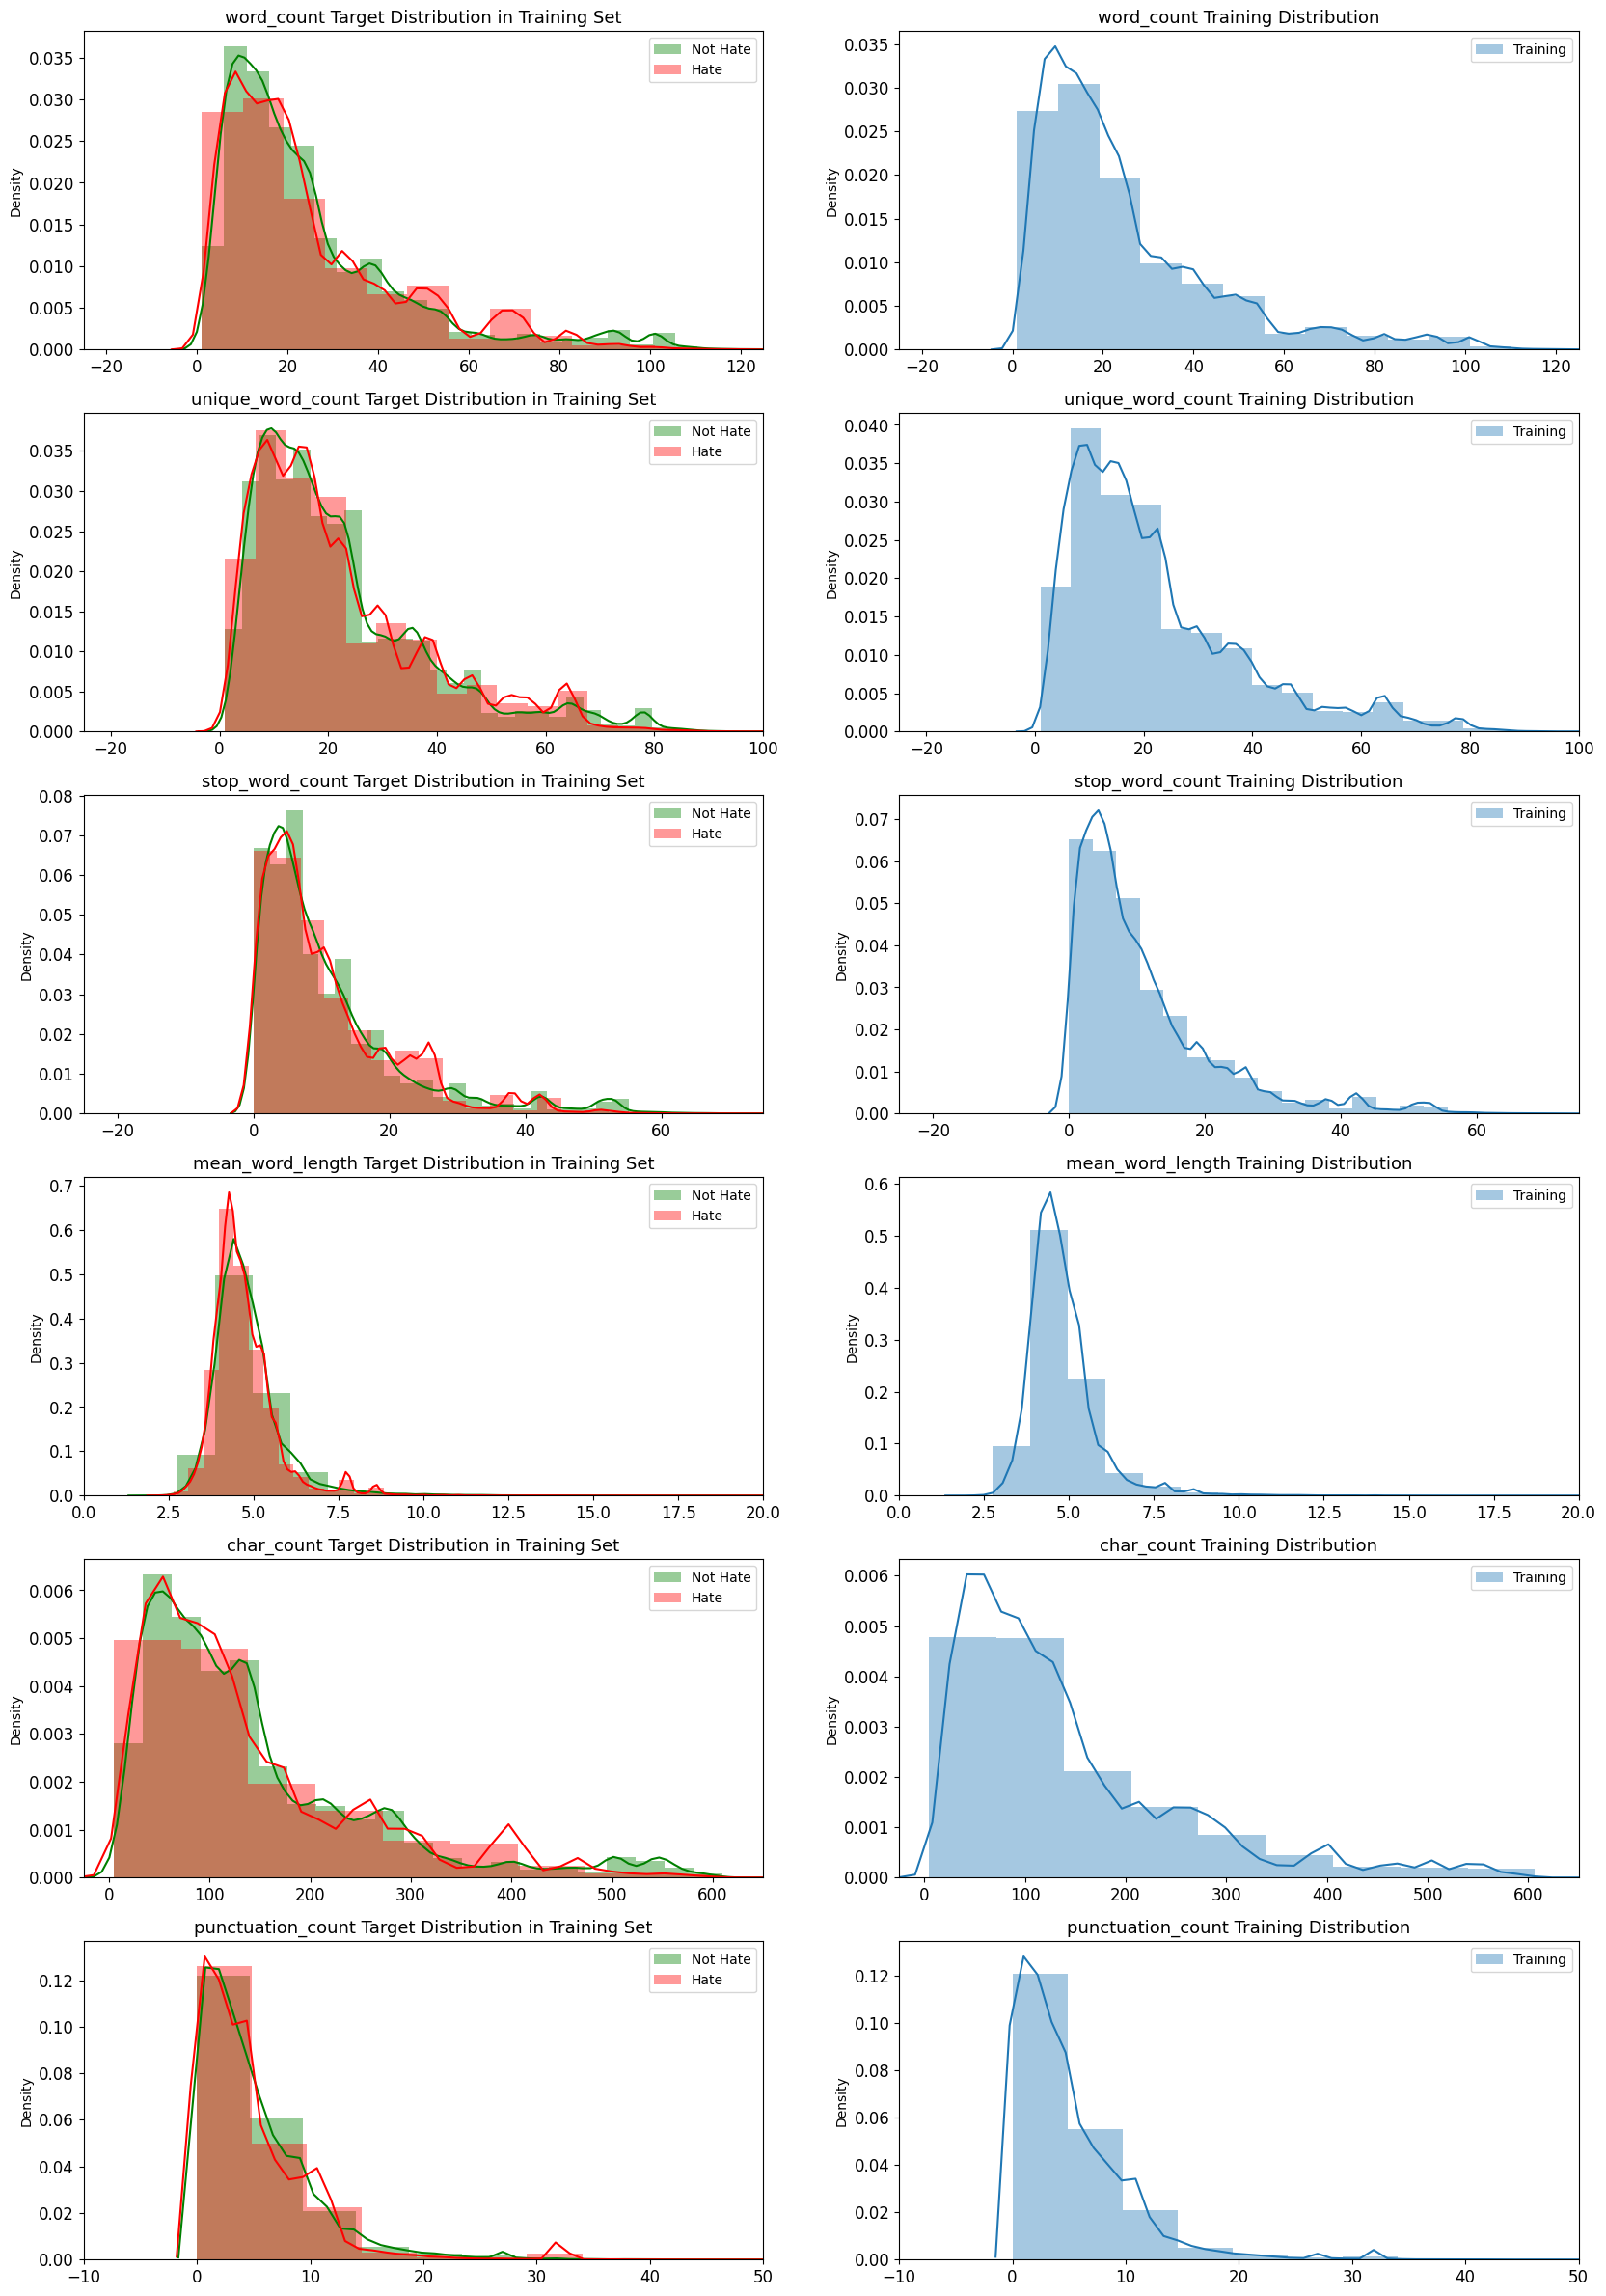

In [14]:
METAFEATURES = ['word_count', 'unique_word_count', 'stop_word_count', 'mean_word_length',
                'char_count', 'punctuation_count']
HATE = data['target'] == 1

fig, axes = plt.subplots(ncols=2, nrows=len(METAFEATURES), figsize=(20, 30), dpi=100)

for i, feature in enumerate(METAFEATURES):
    sns.distplot(stats.loc[~HATE][feature], label='Not Hate', ax=axes[i][0], color='green')
    sns.distplot(stats.loc[HATE][feature], label='Hate', ax=axes[i][0], color='red')

    sns.distplot(stats[feature], label='Training', ax=axes[i][1])
    
    for j in range(2):
        axes[i][j].set_xlabel('')
        axes[i][j].tick_params(axis='x', labelsize=12)
        axes[i][j].tick_params(axis='y', labelsize=12)
        axes[i][j].legend()
    
    axes[i][0].set_title(f'{feature} Target Distribution in Training Set', fontsize=13)
    axes[i][1].set_title(f'{feature} Training Distribution', fontsize=13)

    axes[0][0].set_xlim(-25, 125)
    axes[0][1].set_xlim(-25, 125)

    axes[1][0].set_xlim(-25, 100)
    axes[1][1].set_xlim(-25, 100)

    axes[2][0].set_xlim(-25, 75)
    axes[2][1].set_xlim(-25, 75)

    axes[3][0].set_xlim(-0, 20)
    axes[3][1].set_xlim(-0, 20)

    axes[4][0].set_xlim(-25, 650)
    axes[4][1].set_xlim(-25, 650)

    axes[5][0].set_xlim(-10, 50)
    axes[5][1].set_xlim(-10, 50)


plt.show()

## Target

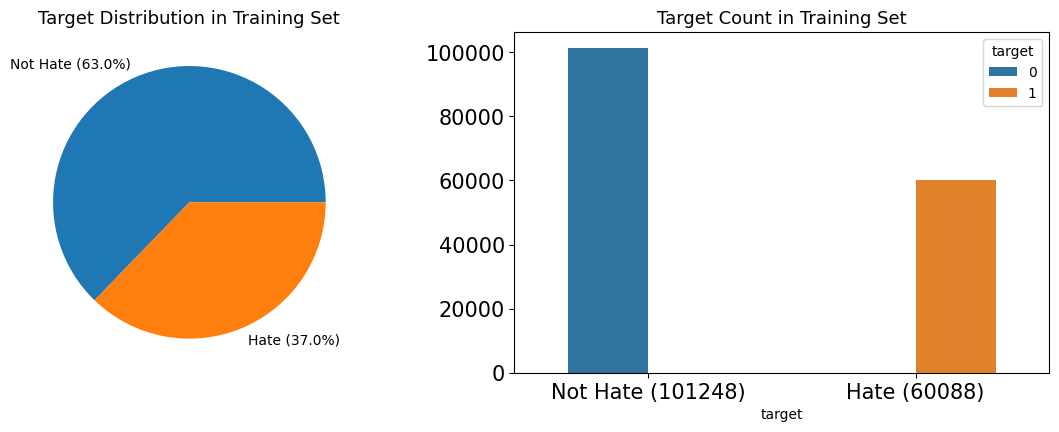

In [15]:
target_count = pd.Series(HATE).value_counts()
non_hate_count = target_count[0]
hate_count = target_count[1]
non_hate_perc = round((target_count[0]*100)/(target_count[0]+target_count[1]),0)
hate_perc = round((target_count[1]*100)/(target_count[0]+target_count[1]),0)

fig, axes = plt.subplots(ncols=2, figsize=(12, 4), dpi=100)
plt.tight_layout()

data.groupby('target').count()['id'].plot(kind='pie', ax=axes[0], labels=[f'Not Hate ({non_hate_perc}%)',f'Hate ({hate_perc}%)'])
sns.countplot(x=data['target'], hue=data['target'], ax=axes[1], width=0.6)

axes[0].set_ylabel('')
axes[1].set_ylabel('')
axes[1].set_xticklabels([f'Not Hate ({non_hate_count})', f'Hate ({hate_count})'])
axes[0].tick_params(axis='x', labelsize=15)
axes[0].tick_params(axis='y', labelsize=15)
axes[1].tick_params(axis='x', labelsize=15)
axes[1].tick_params(axis='y', labelsize=15)

axes[0].set_title('Target Distribution in Training Set', fontsize=13)
axes[1].set_title('Target Count in Training Set', fontsize=13)

plt.show()

## N-grams

An n-gram is a sequence of n words in a text. Unigram is a single word, a bigram is a sequence of two words, a trigram is a sequence of three words, and so on. N-grams are used in natural language processing to identify patterns in language. For example, n-grams can be used to identify words that often appear together, or to identify words that are more likely to appear in a certain context.

In [16]:
def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(' ') if token != '' if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [' '.join(ngram) for ngram in ngrams]

N = 50

# Unigrams
hate_unigrams = defaultdict(int)
non_hate_unigrams = defaultdict(int)

for tweet in data[HATE]['text']:
    for word in generate_ngrams(tweet):
        hate_unigrams[word] += 1
        
for tweet in data[~HATE]['text']:
    for word in generate_ngrams(tweet):
        non_hate_unigrams[word] += 1
        
df_hate_unigrams = pd.DataFrame(sorted(hate_unigrams.items(), key=lambda x: x[1])[::-1])
df_non_hate_unigrams = pd.DataFrame(sorted(non_hate_unigrams.items(), key=lambda x: x[1])[::-1])

# Bigrams
hate_bigrams = defaultdict(int)
non_hate_bigrams = defaultdict(int)

for tweet in data[HATE]['text']:
    for word in generate_ngrams(tweet, n_gram=2):
        hate_bigrams[word] += 1
        
for tweet in data[~HATE]['text']:
    for word in generate_ngrams(tweet, n_gram=2):
        non_hate_bigrams[word] += 1
        
df_hate_bigrams = pd.DataFrame(sorted(hate_bigrams.items(), key=lambda x: x[1])[::-1])
df_non_hate_bigrams = pd.DataFrame(sorted(non_hate_bigrams.items(), key=lambda x: x[1])[::-1])

# Trigrams
hate_trigrams = defaultdict(int)
non_hate_trigrams = defaultdict(int)

for tweet in data[HATE]['text']:
    for word in generate_ngrams(tweet, n_gram=3):
        hate_trigrams[word] += 1
        
for tweet in data[~HATE]['text']:
    for word in generate_ngrams(tweet, n_gram=3):
        non_hate_trigrams[word] += 1
        
df_hate_trigrams = pd.DataFrame(sorted(hate_trigrams.items(), key=lambda x: x[1])[::-1])
df_non_hate_trigrams = pd.DataFrame(sorted(non_hate_trigrams.items(), key=lambda x: x[1])[::-1])

### Unigrams

poner analisis

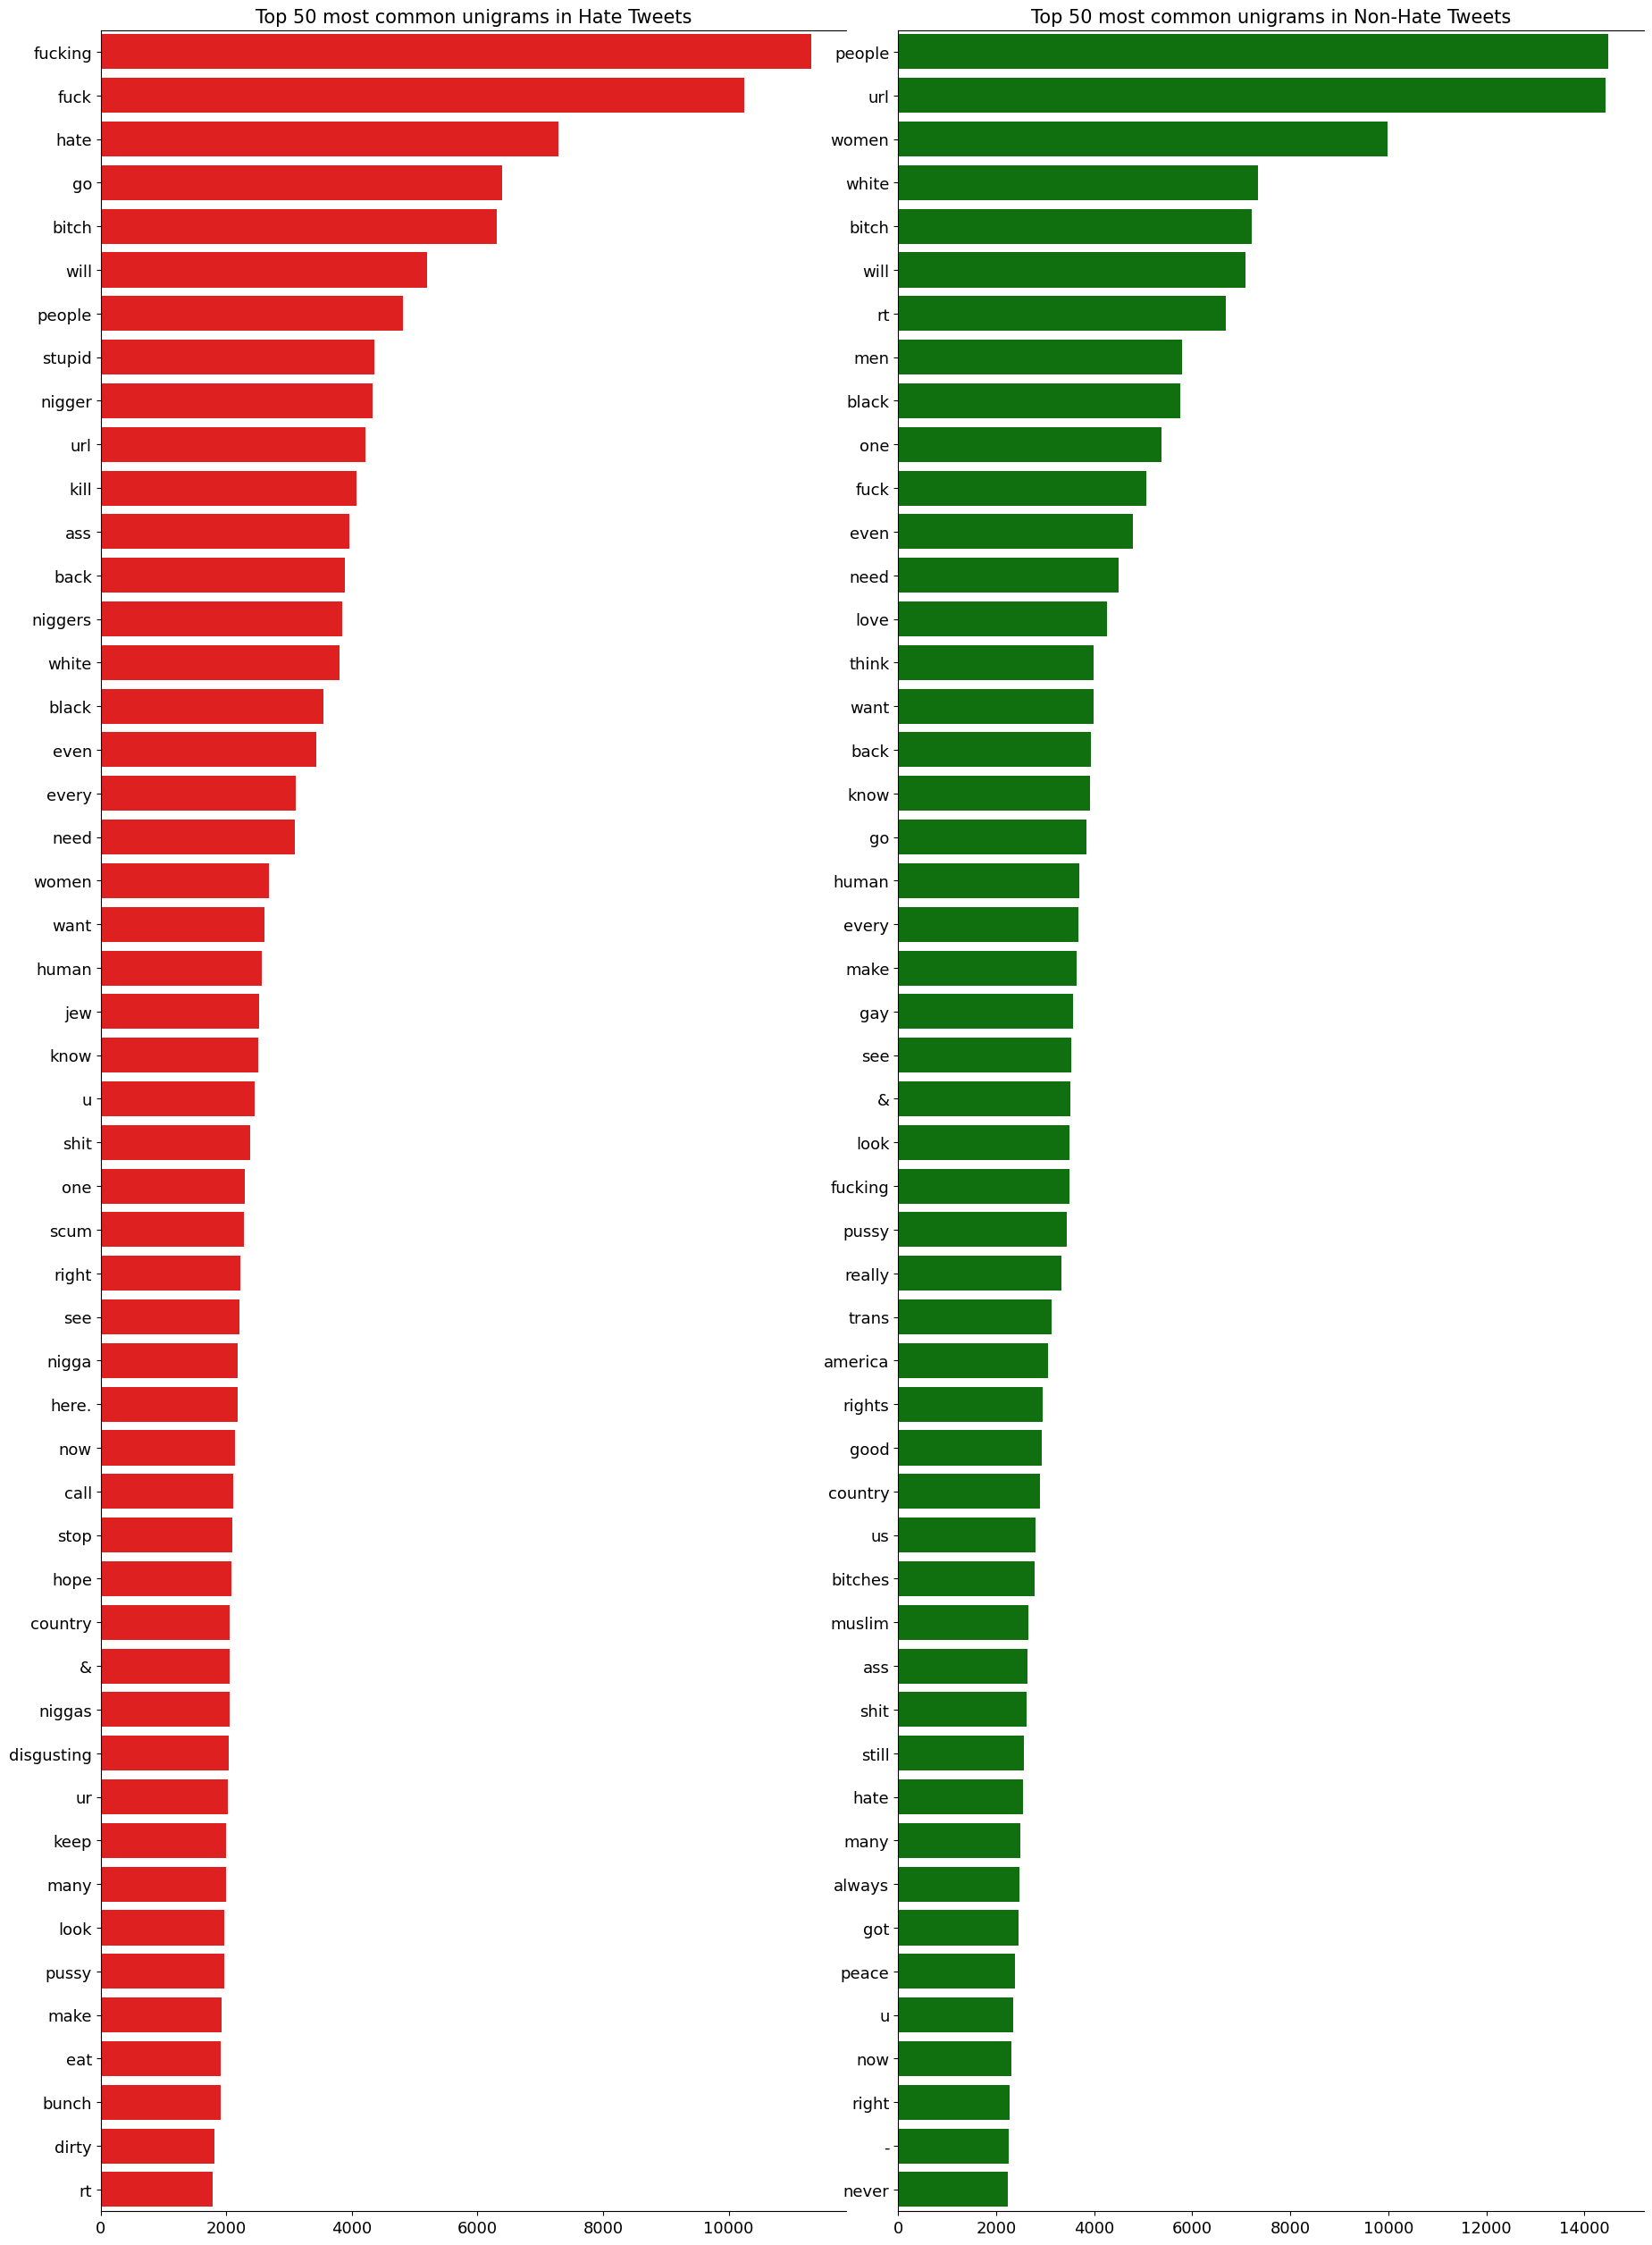

In [17]:
fig, axes = plt.subplots(ncols=2, figsize=(18, 25), dpi=100)
plt.tight_layout()

sns.barplot(y=df_hate_unigrams[0].values[:N], x=df_hate_unigrams[1].values[:N], ax=axes[0], color='red')
sns.barplot(y=df_non_hate_unigrams[0].values[:N], x=df_non_hate_unigrams[1].values[:N], ax=axes[1], color='green')

for i in range(2):
    axes[i].spines['right'].set_visible(False)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelsize=13)
    axes[i].tick_params(axis='y', labelsize=13)

axes[0].set_title(f'Top {N} most common unigrams in Hate Tweets', fontsize=15)
axes[1].set_title(f'Top {N} most common unigrams in Non-Hate Tweets', fontsize=15)

plt.show()

### Bigrams

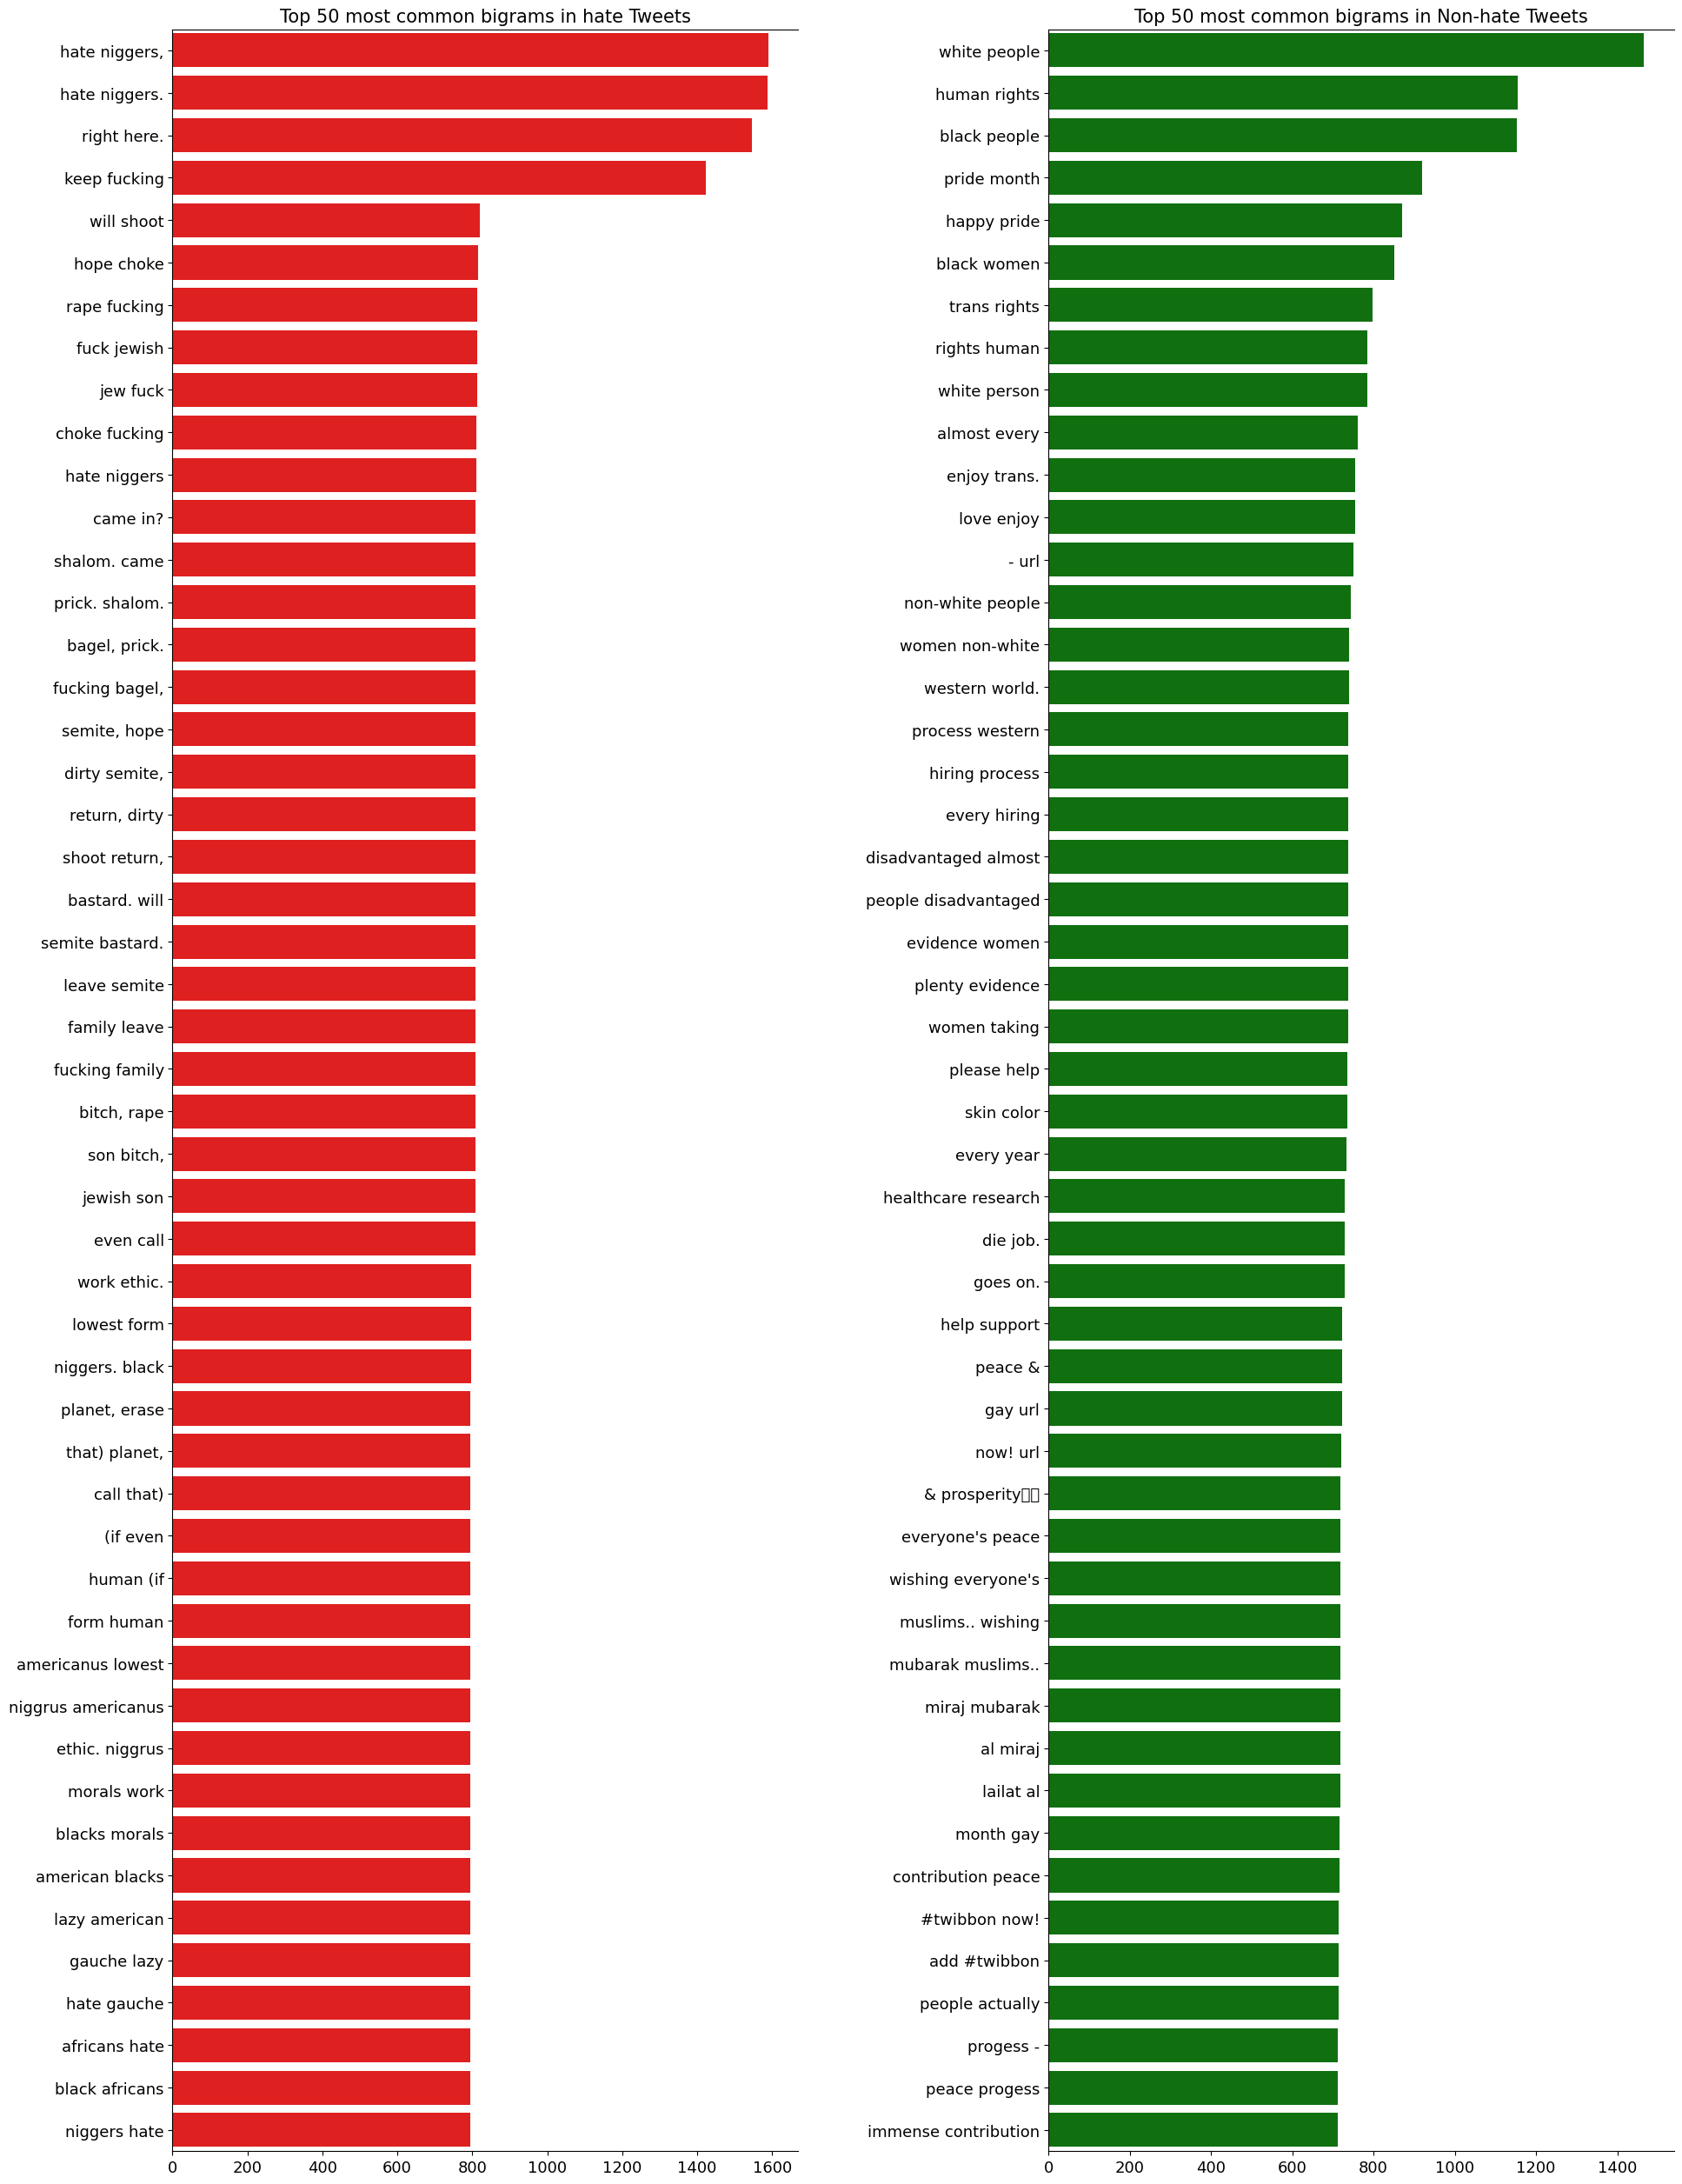

In [18]:
fig, axes = plt.subplots(ncols=2, figsize=(18, 25), dpi=100)
plt.tight_layout()

sns.barplot(y=df_hate_bigrams[0].values[:N], x=df_hate_bigrams[1].values[:N], ax=axes[0], color='red')
sns.barplot(y=df_non_hate_bigrams[0].values[:N], x=df_non_hate_bigrams[1].values[:N], ax=axes[1], color='green')

# Ajustar el espacio entre los subplots
plt.subplots_adjust(wspace=0.4)

for i in range(2):
    axes[i].spines['right'].set_visible(False)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelsize=13)
    axes[i].tick_params(axis='y', labelsize=13)

axes[0].set_title(f'Top {N} most common bigrams in hate Tweets', fontsize=15)
axes[1].set_title(f'Top {N} most common bigrams in Non-hate Tweets', fontsize=15)

plt.show()

### Trigrams

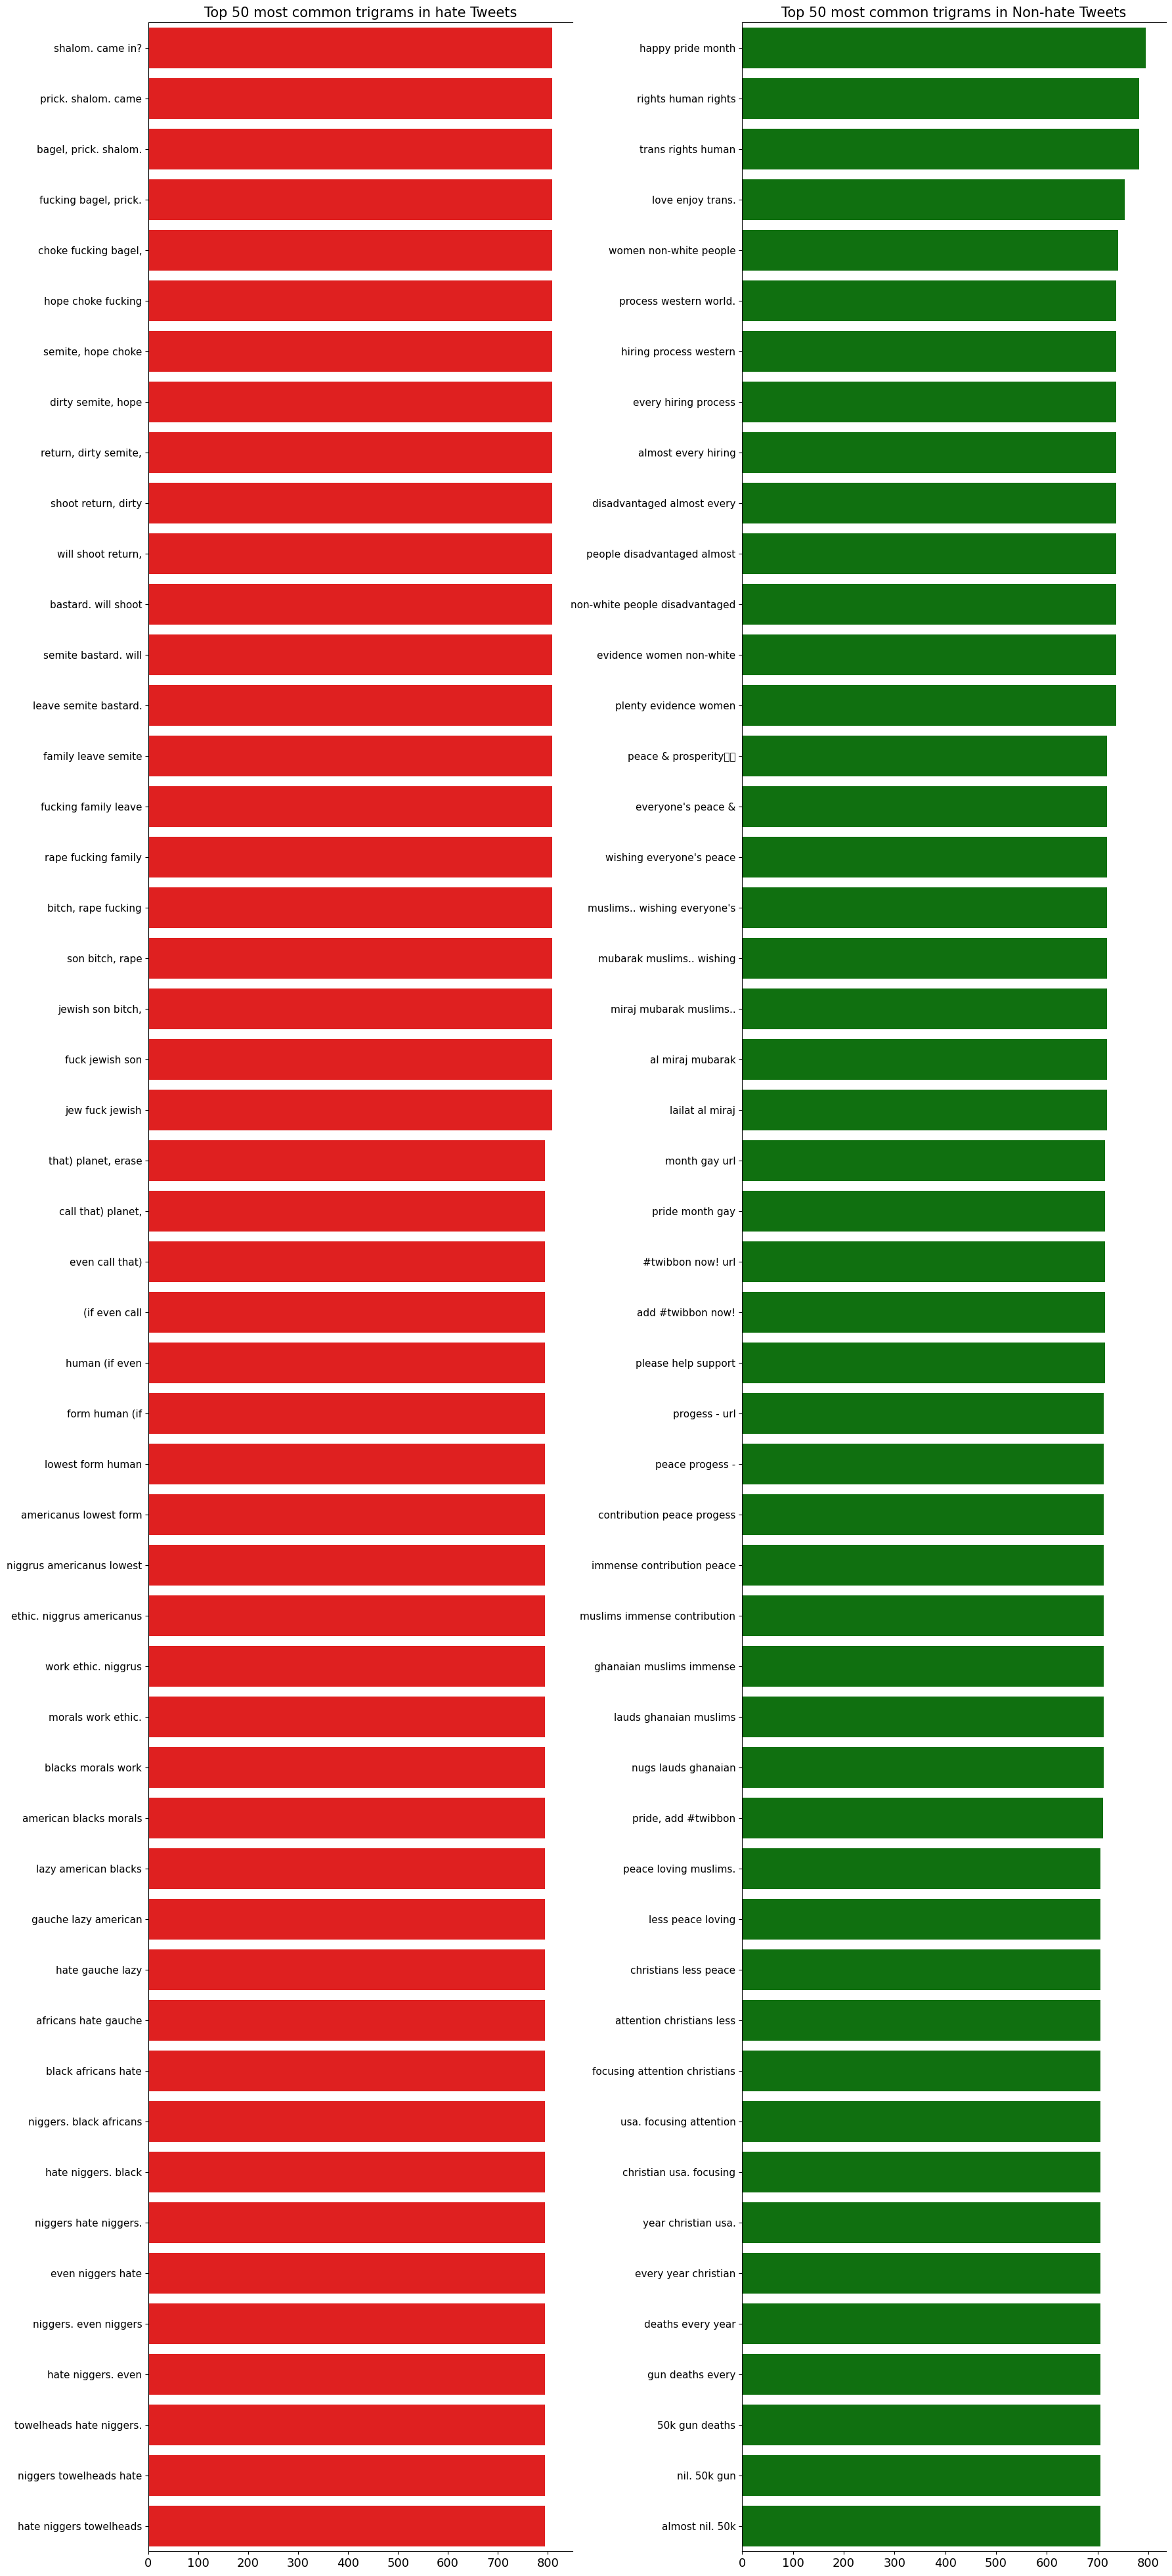

In [19]:
fig, axes = plt.subplots(ncols=2, figsize=(20, 50), dpi=100)

sns.barplot(y=df_hate_trigrams[0].values[:N], x=df_hate_trigrams[1].values[:N], ax=axes[0], color='red')
sns.barplot(y=df_non_hate_trigrams[0].values[:N], x=df_non_hate_trigrams[1].values[:N], ax=axes[1], color='green')

# Ajustar el espacio entre los subplots
plt.subplots_adjust(wspace=0.4)

for i in range(2):
    axes[i].spines['right'].set_visible(False)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelsize=13)
    axes[i].tick_params(axis='y', labelsize=11)

axes[0].set_title(f'Top {N} most common trigrams in hate Tweets', fontsize=15)
axes[1].set_title(f'Top {N} most common trigrams in Non-hate Tweets', fontsize=15)

plt.show()